In [1]:
import sys
# Append the previous directory to the path
sys.path.append('../')

In [2]:
import numpy as np
from exp_utils import CounterPlotNice
from sklearn.ensemble import RandomForestClassifier
# Download Winsconsin Breast Cancer dataset
from sklearn.datasets import load_breast_cancer

X_wbc, y_wbc = load_breast_cancer(return_X_y=True)

model_wbc = RandomForestClassifier(random_state=42, max_depth=4)

model_wbc.fit(X_wbc, y_wbc)

RandomForestClassifier(max_depth=4, random_state=42)

In [3]:
# Print prediction AUC
from sklearn.metrics import roc_auc_score

print(roc_auc_score(y_wbc, model_wbc.predict_proba(X_wbc)[:, 1]))

0.9983087574652503


In [4]:
# Get wbc feature names
wbc_feature_names = load_breast_cancer().feature_names
# Get class names
wbc_class_names = {0: 'Benign', 1: 'Malignant'}

In [5]:
wbc_nice_cf = CounterPlotNice(
    predict_fn=model_wbc.predict_proba,
    X_train=X_wbc,
    y_train=y_wbc,
    cat_feat=[])

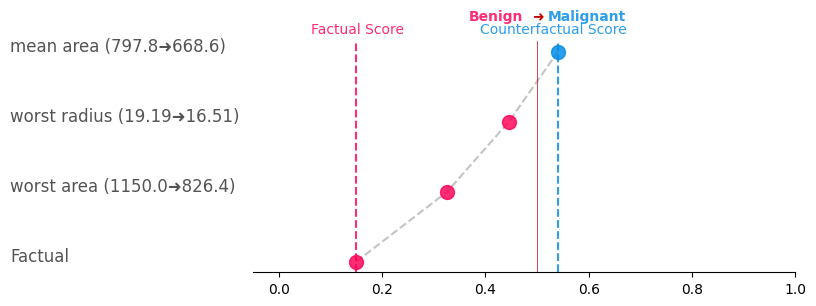

In [9]:
exp_wrong = wbc_nice_cf.explain(np.array([X_wbc[10]]), wbc_feature_names, wbc_class_names)
exp_wrong[0].greedy()

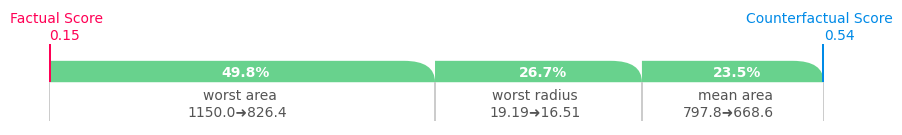

In [10]:
exp_wrong[0].countershapley()

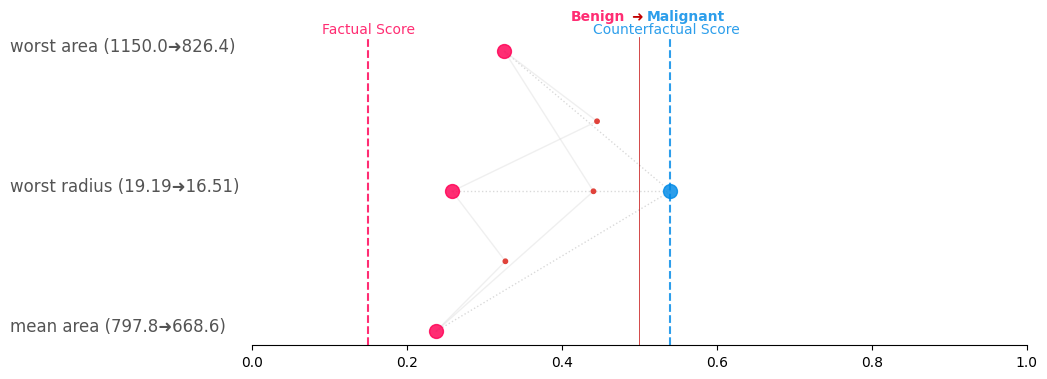

In [11]:
exp_wrong[0].constellation()